In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
path=os.getcwd()+'\\DATA\\picture_partial'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)
        

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
            


x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,7),1000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)
y_test_ori=y_test
print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Images are all in read_images
Shape of x_train is (4800,100,100,1)
Shape of x_test is (1200,100,100,1)
Shape of y_train is (4800,1)
Shape of y_test is (1200,1)
Shape of y_train is (4800,6)


# vgg-60-softmax+原圖

In [14]:
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_soft_60_1
#     global model
    model_soft_60_1 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(6,activation = 'softmax')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_soft_60_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath=r"C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_60_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
train_history_60_1 = model_soft_60_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=60, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  

                              #改

Train on 3360 samples, validate on 1440 samples
Epoch 1/60

Epoch 00001: acc improved from -inf to 0.30774, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_60_1.hdf5
3360/3360 - 18s - loss: 3.4924 - acc: 0.3077 - val_loss: 25.4785 - val_acc: 0.1764
Epoch 2/60

Epoch 00002: acc improved from 0.30774 to 0.33750, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_60_1.hdf5
3360/3360 - 13s - loss: 1.3743 - acc: 0.3375 - val_loss: 1.9524 - val_acc: 0.2785
Epoch 3/60

Epoch 00003: acc improved from 0.33750 to 0.35536, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_60_1.hdf5
3360/3360 - 13s - loss: 1.3445 - acc: 0.3554 - val_loss: 2.1095 - val_acc: 0.1979
Epoch 4/60

Epoch 00004: acc improved from 0.35536 to 0.40923, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_60_1.hdf5
3360/3360 - 13s - loss: 1.2831 - acc: 0.4092 - val_loss: 1.8483 - val_acc: 0.234

3360/3360 - 14s - loss: 0.3797 - acc: 0.8408 - val_loss: 1.5644 - val_acc: 0.6382
Epoch 40/60

Epoch 00040: acc improved from 0.84077 to 0.84524, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_60_1.hdf5
3360/3360 - 14s - loss: 0.3714 - acc: 0.8452 - val_loss: 1.7030 - val_acc: 0.6403
Epoch 41/60

Epoch 00041: acc improved from 0.84524 to 0.86577, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_60_1.hdf5
3360/3360 - 14s - loss: 0.3329 - acc: 0.8658 - val_loss: 0.6442 - val_acc: 0.7507
Epoch 42/60

Epoch 00042: acc did not improve from 0.86577
3360/3360 - 13s - loss: 0.3450 - acc: 0.8560 - val_loss: 1.1714 - val_acc: 0.6597
Epoch 43/60

Epoch 00043: acc did not improve from 0.86577
3360/3360 - 13s - loss: 0.3160 - acc: 0.8655 - val_loss: 0.6575 - val_acc: 0.7521
Epoch 44/60

Epoch 00044: acc improved from 0.86577 to 0.87262, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_60_1.hdf

In [15]:
model_soft_60_1.evaluate(x=x_test,y=y_test)

1200/1200 [==============================] - 1s 1ms/sample - loss: 1.2988 - acc: 0.7083


[1.2987790517012279, 0.7083333]

In [17]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('VGG16(Partial)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()
   # plt.savefig(r'C:\Users\user\Desktop\project\final_model\vgg_picture\confusion_matrix_vgg16_picture01.jpg', bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

1200/1200 [==============================] - 1s 1ms/sample - loss: 1.2988 - acc: 0.7083


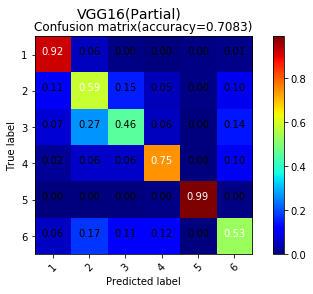

In [18]:
a=model_soft_60_1.evaluate(x=x_test,y=y_test)
plot_confuse(model_soft_60_1, x_test, y_test,round(a[1],4))

# VGG-100-softmax+原圖

In [3]:
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_soft_100_1
#     global model
    model_soft_100_1 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(6,activation = 'softmax')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_soft_100_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath=r"C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_100_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
train_history_100_1 = model_soft_100_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=100, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  

                              #改

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 3360 samples, validate on 1440 samples
Epoch 1/100

Epoch 00001: acc improved from -inf to 0.30923, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_100_1.hdf5
3360/3360 - 19s - loss: 3.4483 - acc: 0.3092 - val_loss: 9.7491 - val_acc: 0.2208
Epoch 2/100

Epoch 00002: acc improved from 0.30923 to 0.35417, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_100_1.hdf5
3360/3360 - 13s - loss: 1.3655 - acc: 0.3542 - val_loss: 1.9986 - val_acc: 0.1944
Epoch 3/100

Epoch 00003: acc improved from 0.35417 to 0.39643, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_100_1.hdf5
3360/3360 - 13s - loss: 1.3087 - acc: 0.3964 - val_loss: 2.3907 - val_acc: 0.2000
Epoch 4/100

Epoch 00004: acc improved from 0.39643 to 0.41726, saving model to C:\Users\user\Desktop\project\VGG1


Epoch 00034: acc improved from 0.86071 to 0.88185, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_100_1.hdf5
3360/3360 - 14s - loss: 0.2935 - acc: 0.8818 - val_loss: 0.5819 - val_acc: 0.7944
Epoch 35/100

Epoch 00035: acc improved from 0.88185 to 0.88750, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_100_1.hdf5
3360/3360 - 14s - loss: 0.2840 - acc: 0.8875 - val_loss: 0.8002 - val_acc: 0.7319
Epoch 36/100

Epoch 00036: acc improved from 0.88750 to 0.88958, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_100_1.hdf5
3360/3360 - 14s - loss: 0.2792 - acc: 0.8896 - val_loss: 0.6010 - val_acc: 0.7750
Epoch 37/100

Epoch 00037: acc improved from 0.88958 to 0.89821, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_soft_100_1.hdf5
3360/3360 - 14s - loss: 0.2547 - acc: 0.8982 - val_loss: 0.6072 - val_acc: 0.7785
Epoch 38/100

Epoch 00038: acc did not improv

Epoch 85/100

Epoch 00085: acc did not improve from 0.93690
3360/3360 - 13s - loss: 0.4058 - acc: 0.8324 - val_loss: 1.1197 - val_acc: 0.7264
Epoch 86/100

Epoch 00086: acc did not improve from 0.93690
3360/3360 - 13s - loss: 0.3813 - acc: 0.8390 - val_loss: 0.9062 - val_acc: 0.7854
Epoch 87/100

Epoch 00087: acc did not improve from 0.93690
3360/3360 - 13s - loss: 0.4057 - acc: 0.8283 - val_loss: 0.9567 - val_acc: 0.7333
Epoch 88/100

Epoch 00088: acc did not improve from 0.93690
3360/3360 - 13s - loss: 0.4484 - acc: 0.8432 - val_loss: 0.6237 - val_acc: 0.7514
Epoch 89/100

Epoch 00089: acc did not improve from 0.93690
3360/3360 - 13s - loss: 0.5181 - acc: 0.8045 - val_loss: 1.0361 - val_acc: 0.6000
Epoch 90/100

Epoch 00090: acc did not improve from 0.93690
3360/3360 - 13s - loss: 0.4185 - acc: 0.8321 - val_loss: 0.6443 - val_acc: 0.7354
Epoch 91/100

Epoch 00091: acc did not improve from 0.93690
3360/3360 - 13s - loss: 0.3570 - acc: 0.8542 - val_loss: 102.4580 - val_acc: 0.5292
Epoc

In [4]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('VGG16(Partial)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()
   # plt.savefig(r'C:\Users\user\Desktop\project\final_model\vgg_picture\confusion_matrix_vgg16_picture01.jpg', bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

1200/1200 [==============================] - 2s 2ms/sample - loss: 0.7599 - acc: 0.7625


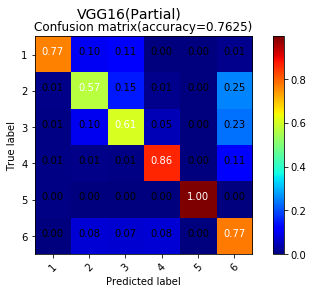

In [5]:
a=model_soft_100_1.evaluate(x=x_test,y=y_test)
plot_confuse(model_soft_100_1, x_test, y_test,round(a[1],4))

In [6]:
y_pred=model_soft_100_1.predict(x_test)

In [7]:
top_k_categorical_accuracy(y_test_ori, y_pred, k=3)

NameError: name 'top_k_categorical_accuracy' is not defined

# vgg-60-sigmoid+原圖

In [5]:
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_sig_60_1
#     global model
    model_sig_60_1 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(6,activation = 'sigmoid')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_sig_60_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath=r"C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
model_sig_60_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=60, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  

                              #改

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3360 samples, validate on 1440 samples
Epoch 1/60

Epoch 00001: acc improved from -inf to 0.83408, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_1.hdf5
3360/3360 - 19s - loss: 0.7635 - acc: 0.8341 - val_loss: 1.1748 - val_acc: 0.7334
Epoch 2/60

Epoch 00002: acc improved from 0.83408 to 0.85937, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_1.hdf5
3360/3360 - 13s - loss: 0.3576 - acc: 0.8594 - val_loss: 0.4460 - val_acc: 0.8398
Epoch 3/60

Epoch 00003: acc improved from 0.85937 to 0.86002, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_1.hdf5
3360/3360 - 13s - loss: 0.3541 - acc: 0.8600 - val_loss: 0.5304 - val_acc: 0.8333
Epoch 4/60

Epoch 00004: acc 

3360/3360 - 14s - loss: 0.1206 - acc: 0.9485 - val_loss: 0.6409 - val_acc: 0.8602
Epoch 38/60

Epoch 00038: acc improved from 0.94851 to 0.95164, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_1.hdf5
3360/3360 - 14s - loss: 0.1134 - acc: 0.9516 - val_loss: 0.2142 - val_acc: 0.9204
Epoch 39/60

Epoch 00039: acc did not improve from 0.95164
3360/3360 - 13s - loss: 0.1173 - acc: 0.9484 - val_loss: 0.1810 - val_acc: 0.9259
Epoch 40/60

Epoch 00040: acc improved from 0.95164 to 0.95352, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_1.hdf5
3360/3360 - 14s - loss: 0.1043 - acc: 0.9535 - val_loss: 0.2263 - val_acc: 0.9167
Epoch 41/60

Epoch 00041: acc improved from 0.95352 to 0.95496, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_1.hdf5
3360/3360 - 14s - loss: 0.1026 - acc: 0.9550 - val_loss: 0.4929 - val_acc: 0.8708
Epoch 42/60

Epoch 00042: acc improved from 0.95496 to 0.956

In [28]:
import pandas as pd

             # model name
predict=model_sig_60_1.predict(x_test)

y_test_ori=pd.DataFrame(y_test_ori)
y_test_ori=y_test_ori.rename(columns={0:'truelabel'})

  
a=pd.DataFrame(predict)
a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

a['max_value']=a.max(axis=1)
a['second_large_value']=0
   

a['max']=np.argmax(predict,axis=1)+1
a['second_large']=0
 
    

for i in range(0,(a.shape[0])):
    tmp_list=0
    num_list=a.iloc[i,0:6]
    tmp_list=sorted(num_list)
    a['second_large_value'].iloc[i]=tmp_list[-2]
    a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        
        
b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
b['acc']=0

for i in range(0,(b.shape[0])):
    con1=[str(b['truelabel'][i])]
    con1=sorted(con1)
    con2=[str(b['max'][i])]
    con2=sorted(con2)

    b['acc'].iloc[i]=np.where(con1==con2,1,0)  
    
    
# accuracy
b['acc'].sum()/b.shape[0]    

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    #plt.suptitle('VGG16(Picture 01)',y=1.01,fontsize=14)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()
   # plt.savefig(r'C:\Users\user\Desktop\project\final_model\vgg_picture\confusion_matrix_vgg16_picture01.jpg', bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1))

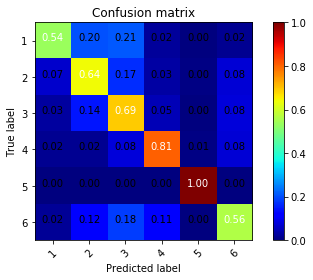

In [34]:
plot_confuse(model_sig_60_1, x_test, y_test)

# vgg-60-sigmoid+拿掉原圖

In [35]:
path=r'C:\Users\user\Desktop\project\picture_partial _drop_ori'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)
        

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
            


print(read_images.shape)

Images are all in read_images
(5000, 100, 100)


In [36]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,6),1000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)
y_test_ori=y_test
print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (4000,100,100,1)
Shape of x_test is (1000,100,100,1)
Shape of y_train is (4000,1)
Shape of y_test is (1000,1)
Shape of y_train is (4000,5)


In [17]:
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_sig_60_drop_ori
#     global model
    model_sig_60_drop_ori = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(5,activation = 'sigmoid')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_sig_60_drop_ori.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath=r"C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_drop_ori.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
model_sig_60_drop_ori.fit(x=x_train, y=y_train, validation_split=0.3, epochs=60, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  

                              #改

Train on 2800 samples, validate on 1200 samples
Epoch 1/60

Epoch 00001: acc improved from -inf to 0.78743, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_drop_ori.hdf5
2800/2800 - 13s - loss: 0.9437 - acc: 0.7874 - val_loss: 20.6783 - val_acc: 0.6822
Epoch 2/60

Epoch 00002: acc improved from 0.78743 to 0.81864, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_drop_ori.hdf5
2800/2800 - 11s - loss: 0.4332 - acc: 0.8186 - val_loss: 0.5397 - val_acc: 0.7805
Epoch 3/60

Epoch 00003: acc improved from 0.81864 to 0.84179, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_drop_ori.hdf5
2800/2800 - 11s - loss: 0.3700 - acc: 0.8418 - val_loss: 0.5603 - val_acc: 0.7992
Epoch 4/60

Epoch 00004: acc improved from 0.84179 to 0.84636, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_drop_ori.hdf5
2800/2800 - 11s - loss: 0.3454 - acc: 0.8464 - val_loss:

Epoch 36/60

Epoch 00036: acc improved from 0.96857 to 0.97264, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_drop_ori.hdf5
2800/2800 - 11s - loss: 0.0644 - acc: 0.9726 - val_loss: 0.1671 - val_acc: 0.9398
Epoch 37/60

Epoch 00037: acc did not improve from 0.97264
2800/2800 - 11s - loss: 0.0659 - acc: 0.9716 - val_loss: 0.2372 - val_acc: 0.9167
Epoch 38/60

Epoch 00038: acc did not improve from 0.97264
2800/2800 - 11s - loss: 0.0644 - acc: 0.9706 - val_loss: 0.2918 - val_acc: 0.9077
Epoch 39/60

Epoch 00039: acc improved from 0.97264 to 0.97429, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_drop_ori.hdf5
2800/2800 - 11s - loss: 0.0596 - acc: 0.9743 - val_loss: 0.1723 - val_acc: 0.9355
Epoch 40/60

Epoch 00040: acc improved from 0.97429 to 0.97443, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\model_iter_sig_60_drop_ori.hdf5
2800/2800 - 11s - loss: 0.0626 - acc: 0.9744 - val_loss: 0.198

In [37]:
import pandas as pd

             # model name
predict=model_sig_60_drop_ori.predict(x_test)

y_test_ori=pd.DataFrame(y_test_ori)
y_test_ori=y_test_ori.rename(columns={0:'truelabel'})

  
a=pd.DataFrame(predict)
a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

a['max_value']=a.max(axis=1)
a['second_large_value']=0
   

a['max']=np.argmax(predict,axis=1)+1
a['second_large']=0
 
    

for i in range(0,(a.shape[0])):
    tmp_list=0
    num_list=a.iloc[i,0:6]
    tmp_list=sorted(num_list)
    a['second_large_value'].iloc[i]=tmp_list[-2]
    a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        
        
b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
b['acc']=0

for i in range(0,(b.shape[0])):
    con1=[str(b['truelabel'][i])]
    con1=sorted(con1)
    con2=[str(b['max'][i])]
    con2=sorted(con2)

    b['acc'].iloc[i]=np.where(con1==con2,1,0)  
    
    
# accuracy
b['acc'].sum()/b.shape[0]   

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0.364

In [38]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    #plt.suptitle('VGG16(Picture 01)',y=1.01,fontsize=14)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()
   # plt.savefig(r'C:\Users\user\Desktop\project\final_model\vgg_picture\confusion_matrix_vgg16_picture01.jpg', bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1))

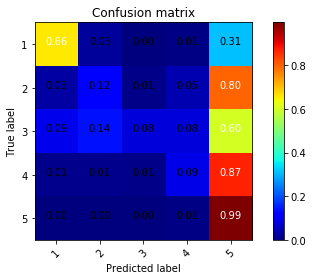

In [39]:
plot_confuse(model_sig_60_drop_ori, x_test, y_test)

# vgg-50-sigmoid+原圖

In [14]:
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_p_50_1
#     global model
    model_p_50_1 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(6,activation = 'sigmoid')
        ])
VGG16()

####################################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))


model_p_50_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##Check points

# 將最高的那次紀錄下來，儲存在 "checkpoint30_record"的資料夾裡
# 檔名這裡 model_iter30_3.hdf5 要自己修改  30是epoch 3是第3次

filepath=r"C:\Users\user\Desktop\project\VGG16_picture_partial\checkpoint50_record\model_iter50_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')
train_history_50_1 = model_p_50_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  
# train_history_30_3要修改 30是epoch ,3是第3次

#########################################################################

#把訓練結果(train_history_30_3)存成list 匯出去存在'train_history'的資料夾裡    

# 裡面有2個  train_history_30_3 要改,30是epoch ,3是第3次

# file='train_history的資料夾\train_history_30_3.lst'
                                                                          #改

    
with open(file=r'C:\Users\user\Desktop\project\VGG16_picture_partial\train_history_50\train_history_50_1.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_50_1.history, outhis)  
    
                              #改

Train on 3360 samples, validate on 1440 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.82450, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\checkpoint50_record\model_iter50_1.hdf5
3360/3360 - 15s - loss: 0.7009 - acc: 0.8245 - val_loss: 1.5901 - val_acc: 0.7947
Epoch 2/50

Epoch 00002: acc improved from 0.82450 to 0.85734, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\checkpoint50_record\model_iter50_1.hdf5
3360/3360 - 13s - loss: 0.3595 - acc: 0.8573 - val_loss: 0.4799 - val_acc: 0.8288
Epoch 3/50

Epoch 00003: acc improved from 0.85734 to 0.86647, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\checkpoint50_record\model_iter50_1.hdf5
3360/3360 - 13s - loss: 0.3382 - acc: 0.8665 - val_loss: 0.5055 - val_acc: 0.8264
Epoch 4/50

Epoch 00004: acc improved from 0.86647 to 0.87019, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\checkpoint50_record\model_iter50_1.hdf5
3360/3360 - 13s - loss: 0

Epoch 42/50

Epoch 00042: acc did not improve from 0.94697
3360/3360 - 13s - loss: 0.1247 - acc: 0.9449 - val_loss: 0.1788 - val_acc: 0.9274
Epoch 43/50

Epoch 00043: acc improved from 0.94697 to 0.94826, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\checkpoint50_record\model_iter50_1.hdf5
3360/3360 - 14s - loss: 0.1212 - acc: 0.9483 - val_loss: 0.1628 - val_acc: 0.9329
Epoch 44/50

Epoch 00044: acc did not improve from 0.94826
3360/3360 - 13s - loss: 0.1206 - acc: 0.9470 - val_loss: 0.3727 - val_acc: 0.8734
Epoch 45/50

Epoch 00045: acc improved from 0.94826 to 0.95045, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\checkpoint50_record\model_iter50_1.hdf5
3360/3360 - 13s - loss: 0.1158 - acc: 0.9504 - val_loss: 0.1699 - val_acc: 0.9310
Epoch 46/50

Epoch 00046: acc improved from 0.95045 to 0.95243, saving model to C:\Users\user\Desktop\project\VGG16_picture_partial\checkpoint50_record\model_iter50_1.hdf5
3360/3360 - 13s - loss: 0.1117 - acc: 

In [3]:
model_p_50_1=load_model(r'C:\Users\user\Desktop\project\VGG16_picture_partial\checkpoint50_record\model_iter50_1.hdf5')   

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
model_p_50_1.evaluate(x_test,y_test)

1200/1200 [==============================] - 3s 3ms/sample - loss: 0.2146 - acc: 0.9143


[0.2145630824069182, 0.9143056]

In [32]:
#a=model_p_50_1.predict(x_test)
#a=pd.DataFrame(a)


In [41]:

y_test_ori=pd.DataFrame(y_test_ori)
y_test_ori=y_test_ori.rename(columns={0:'truelabel'})

  
a=pd.DataFrame(predict)
a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

a['max_value']=a.max(axis=1)
a['second_large_value']=0
   

a['max']=np.argmax(predict,axis=1)+1
a['second_large']=0
 
    

for i in range(0,(a.shape[0])):
    tmp_list=0
    num_list=a.iloc[i,0:6]
    tmp_list=sorted(num_list)
    a['second_large_value'].iloc[i]=tmp_list[-2]
    a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        
   
        
        
b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
  

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1200/1200 [==============================] - 1s 1ms/sample - loss: 0.2146 - acc: 0.9143


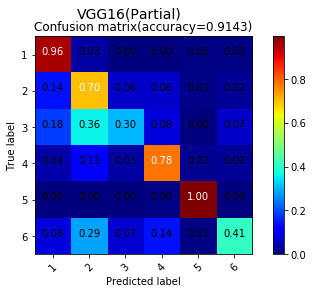

In [9]:
a=model_p_50_1.evaluate(x=x_test,y=y_test)
plot_confuse(model_p_50_1, x_test, y_test,round(a[1],4))

In [18]:
prediction = np.argmax(model_p_50_1.predict(x_test),axis= 1)
prediction

array([1, 1, 0, ..., 3, 4, 0], dtype=int64)

In [20]:
import sklearn.metrics as metrics

In [23]:
metrics.cohen_kappa_score(y_test_ori, prediction) 

-0.09922780853508617

# test mix

In [ ]:
# 一半一半

In [70]:
path='C:\\Users\\user\\Desktop\\project\\picture_12'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 

Images are all in read_images
(600, 100, 100)


In [71]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,4),200).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()

print('Shape of y_test_ori is (%d,%d)'%(y_test_ori.shape))

Shape of x_train is (120,100,100,1)
Shape of x_test is (480,100,100,1)
Shape of y_train is (120,1)
Shape of y_test is (480,1)
Shape of y_test_ori is (480,1)


In [50]:
import pandas as pd

In [66]:
def type3_mix_accuracy(y_test_ori,predict):
    y_test_ori=pd.DataFrame(y_test_ori)
    y_test_ori=y_test_ori.rename(columns={0:'truelabel'})
    y_test_ori['true01']=np.where(y_test_ori['truelabel']==1,1,np.where(y_test_ori['truelabel']==2,3,4))
    y_test_ori['true02']=np.where(y_test_ori['truelabel']==1,2,np.where(y_test_ori['truelabel']==2,4,5))
  
    a=pd.DataFrame(predict)
    a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

    a['max_value']=a.max(axis=1)
    a['second_large_value']=0
   

    a['max']=np.argmax(predict,axis=1)+1
    a['second_large']=0
 
    

    for i in range(0,(a.shape[0])):
        tmp_list=0
        num_list=a.iloc[i,0:6]
        tmp_list=sorted(num_list)
        a['second_large_value'].iloc[i]=tmp_list[-2]
        a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        
   
        
        
    b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
    b['acc']=0

    for i in range(0,(b.shape[0])):
        con1=[str(b['true01'][i]),str(b['true02'][i])]
        con1=sorted(con1)
        con2=[str(b['max'][i]),str(b['second_large'][i])]
        con2=sorted(con2)

        b['acc'].iloc[i]=np.where(con1==con2,1,0)

return (print('三種混合的準確率{}'.format(b['acc'].sum()/b.shape[0])))

In [75]:
    y_test_ori=pd.DataFrame(y_test_ori)
    y_test_ori=y_test_ori.rename(columns={0:'truelabel'})
    y_test_ori['true01']=np.where(y_test_ori['truelabel']==1,1,np.where(y_test_ori['truelabel']==2,3,4))
    y_test_ori['true02']=np.where(y_test_ori['truelabel']==1,2,np.where(y_test_ori['truelabel']==2,4,5))
    y_test_ori['true03']=6
    
    a=pd.DataFrame(predict)
    a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

    a['max_value']=a.max(axis=1)
    a['second_large_value']=0
    a['third_large_value']=0
   

    a['max']=np.argmax(predict,axis=1)+1
    a['second_large']=0
    a['third_large']=0
    

    for i in range(0,(a.shape[0])):
        tmp_list=0
        num_list=a.iloc[i,0:6]
        tmp_list=sorted(num_list) 
        a['second_large_value'].iloc[i]=tmp_list[-2]
        a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        
    for i in range(0,(a.shape[0])):
        tmp_list=0
        num_list=a.iloc[i,0:6]
        tmp_list=sorted(num_list) 
        a['third_large_value'].iloc[i]=tmp_list[-3]
        a['third_large'].iloc[i]=np.where(num_list==tmp_list[-3])[0][0]+1
        
        
    b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
    b['acc']=0

    for i in range(0,(b.shape[0])):
        con1=[str(b['true01'][i]),str(b['true02'][i]),str(b['true03'][i])]
        con1=sorted(con1)
        con2=[str(b['max'][i]),str(b['second_large'][i]),str(b['third_large'][i])]
        con2=sorted(con2)

        b['acc'].iloc[i]=np.where(con1==con2,1,0)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [76]:
b[1:30]

,key_0,truelabel,true01,true02,true03,1,2,3,4,5,6,max_value,second_large_value,third_large_value,max,second_large,third_large,acc
1,1,2,3,4,6,0.005911,0.396038,0.086885,0.015031,3.898144e-05,0.555770,0.555770,0.396038,0.086885,6,2,3,0
2,2,2,3,4,6,0.908246,0.026576,0.033838,0.001608,5.632639e-06,0.007899,0.908246,0.033838,0.026576,1,3,2,0
3,3,2,3,4,6,0.062342,0.637007,0.192636,0.060909,4.409611e-03,0.304687,0.637007,0.304687,0.192636,2,6,3,0
4,4,3,4,5,6,0.000140,0.008718,0.003795,0.132859,1.819134e-04,0.809228,0.809228,0.132859,0.008718,6,4,2,0
5,5,3,4,5,6,0.000006,0.003316,0.001116,0.000348,7.271767e-06,0.995506,0.995506,0.003316,0.001116,6,2,3,0
6,6,2,3,4,6,0.018236,0.112235,0.129081,0.571265,1.065314e-03,0.082058,0.571265,0.129081,0.112235,4,3,2,0
7,7,1,1,2,6,0.739781,0.167346,0.122960,0.059348,1.809865e-03,0.085658,0.739781,0.167346,0.122960,1,2,3,0
8,8,1,1,2,6,0.973959,0.003506,0.002831,0.000351,1.788139e-07,0.002401,0.973959,0.003506,0.002831,1,2,3,0
9,9,1,1,2,6,0.958420,0.011384,0.010229,0.000680,3.576279e-07,0.002782,0.958420,0.011384,0.010229,1,2,3,0
10,10,3,4,5,6,0.009121,0.081409,0.085642,0.698512,1.036048e-03,0.075344,0.698512,0.085642,0.081409,4,3,2,0
